In [117]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [118]:
def f(t, x):
    return 3.0 * x * t * t 

def analyt(a, b, h):
    t = np.arange(a, b+h, h)
    return np.exp(t * t * t)

def heun_method(f, a, b, n, IV, h):
    t = np.arange(a, b+h, h)
    x = np.zeros((n+1,))
    t[0], x[0] = IV
    for i in range(1, n+1):
        f1 = f(t[i-1], x[i-1])
        f2 = f(t[i-1] + (2.0/3.0) * h, x[i-1] + (2.0/3.0) * h * f1)
        x[i] = x[i-1] + h * (f1 + 3.0 * f2) / 4.0
    return t, x

def midpoint_method(f, a, b, n, IV, h):
    t = np.arange(a, b+h, h)
    x = np.zeros((n+1,))
    t[0], x[0] = IV
    for i in range(1, n+1):
        x[i] = x[i-1] + h * f(t[i-1] + h / 2.0, x[i-1] + h * f(t[i-1], x[i-1]) / 2.0)
    return t, x 

In [122]:
h = 0.2
#steps
n = 5
#limits 0<x<1
a, b = 0.0, 1.0
#initial value y(x=0) = 1
IV = (0.0, 1.0)

#f = 3 * x * x * y * y
#heun's method
t, x = heun_method(f, a, b, n, IV, h)
# midpoint method
y, z = midpoint_method(f, a, b, n, IV, h)
error = lambda x, t: abs((t - x) / t) * 100
print(error(analyt(a, b, h), x))
print(t)
print(analyt(a, b, h))

[0.00000000e+00 3.18308574e-03 7.86665384e-02 4.20968339e-01
 1.44884694e+00 4.04855859e+00]
[0.  0.2 0.4 0.6 0.8 1. ]
[1.         1.00803209 1.0660924  1.24110238 1.66862511 2.71828183]


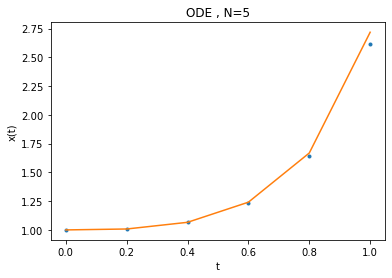

x(t) =  [1.         1.008      1.0652544  1.23589963 1.64479455 2.61251272]
error:  [0.00000000e+00 3.18308574e-03 7.86665384e-02 4.20968339e-01
 1.44884694e+00 4.04855859e+00]


In [123]:
plt.plot( t, x,".", label="Heun")
plt.plot(t, analyt(a, b, h), "-", label = "analytical")
plt.title( "ODE , N="+str(n) )
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

print("x(t) = ", x)
print("error: ", error(analyt(a, b, h), x))

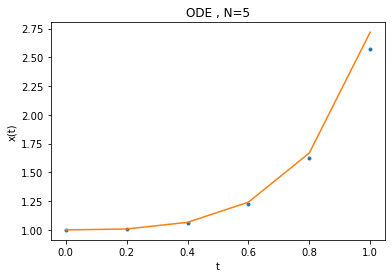

x(t) =  [1.         1.006      1.06097589 1.2277613  1.627707   2.57065719]
error:  [0.         0.20199657 0.48224572 1.0866185  2.51385012 5.74268082]


In [125]:
plt.plot( y, z, ".", label="Midpoint")
plt.plot(y, analyt(a, b, h), "-", label = "analytical")
plt.title( "ODE , N="+str(n) )
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()


print("x(t) = ", z)
print("error: ", error(analyt(a, b, h), z))

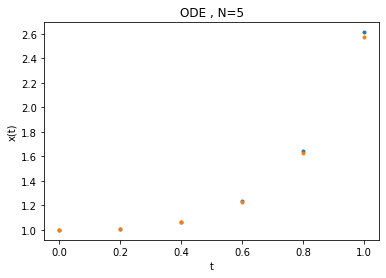

In [126]:
plt.plot( t, x,".", label="Heun")
plt.plot( y, z, ".", label="Midpoint")
plt.title( "ODE , N="+str(n) )
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()